In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv('yes-no-dataset.csv')

In [3]:
df.head()

,id,text,label
0,501,yes I have,0
1,502,no I don't,1
2,503,I sure have,0
3,504,I have it almost,0
4,505,I highly have,0


In [4]:
df.tail()

,id,text,label
198,97,I did not notice,1
199,98,this symptom is not noticed,1
200,99,nothing bad noticed,1
201,100,hardly notice any other,1
202,101,there was not any other problems,1


<AxesSubplot:xlabel='label', ylabel='Count'>

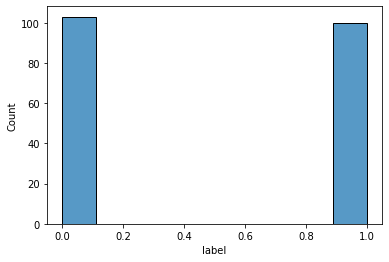

In [5]:
sns.histplot(df.label)

In [6]:
df.columns

Index(['id', 'text', 'label'], dtype='object')

In [7]:
print('length of data is', len(df))

length of data is 203


In [8]:
df. shape

(203, 3)

In [9]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      203 non-null    int64 
 1   text    203 non-null    object
 2   label   203 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.9+ KB


In [10]:
df.isnull()

,id,text,label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
198,False,False,False
199,False,False,False
200,False,False,False
201,False,False,False


In [11]:
#sum of null values

np.sum(df.isnull().any(axis=1))

0

In [12]:
#counting unique attributes
df.nunique()

id       203
text     135
label      2
dtype: int64

In [13]:
df['label'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='label', ylabel='count'>

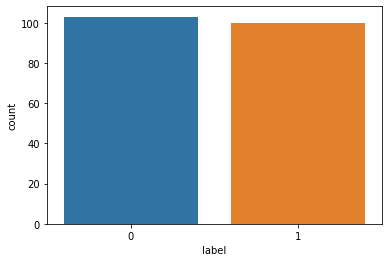

In [14]:
sns.countplot(x='label', data=df)

In [15]:
yes_Count = 0
no_Count = 0
for i in range(len(df)):
    if df.label[i] == 0:
        yes_Count = yes_Count + 1
    else:
        no_Count = no_Count + 1
        
yes_Count,no_Count

(103, 100)

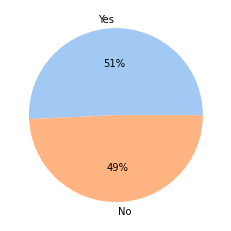

In [16]:
#define data
data = [yes_Count,no_Count] 
labels = ['Yes', 'No']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Preprocessing

In [17]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [18]:
df.head()

,id,text,label
0,501,yes I have,0
1,502,no I don't,1
2,503,I sure have,0
3,504,I have it almost,0
4,505,I highly have,0


In [19]:
# remove short words
df['clean_text'] = df['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>1]))
df.head()

,id,text,label,clean_text
0,501,yes I have,0,yes have
1,502,no I don't,1,no don't
2,503,I sure have,0,sure have
3,504,I have it almost,0,have it almost
4,505,I highly have,0,highly have


In [20]:
tokenized_text = df['clean_text'].apply(lambda x: x.split())
tokenized_text.head()

0           [yes, have]
1           [no, don't]
2          [sure, have]
3    [have, it, almost]
4        [highly, have]
Name: clean_text, dtype: object

In [21]:
df['clean_text'].head()

0          yes have
1          no don't
2         sure have
3    have it almost
4       highly have
Name: clean_text, dtype: object

In [22]:
df['clean_text'].tail()

198                      did not notice
199         this symptom is not noticed
200                 nothing bad noticed
201             hardly notice any other
202    there was not any other problems
Name: clean_text, dtype: object

In [23]:
# combine words into single sentence
for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])
    
df['clean_text'] = tokenized_text
df.head()

,id,text,label,clean_text
0,501,yes I have,0,yes have
1,502,no I don't,1,no don't
2,503,I sure have,0,sure have
3,504,I have it almost,0,have it almost
4,505,I highly have,0,highly have


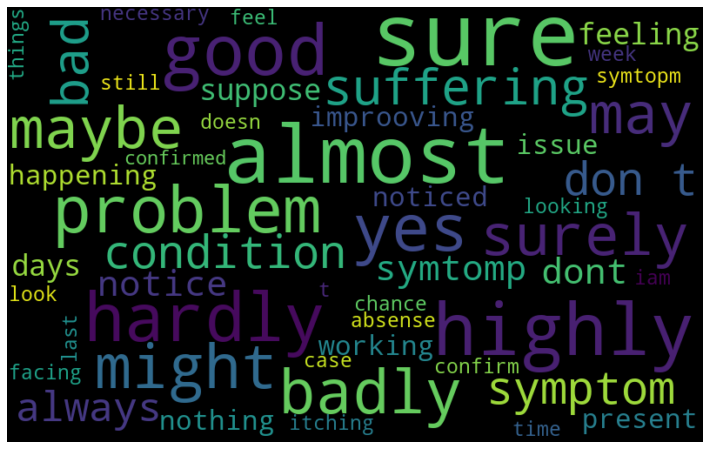

In [24]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

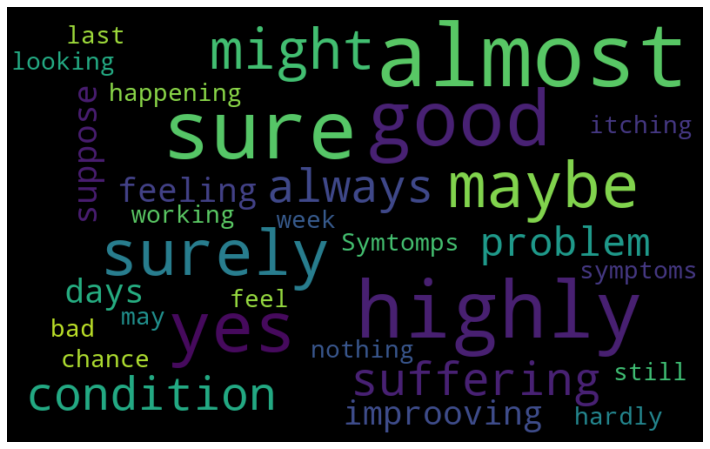

In [25]:
# frequent words visualization for yes
all_words = " ".join([sentence for sentence in df['clean_text'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

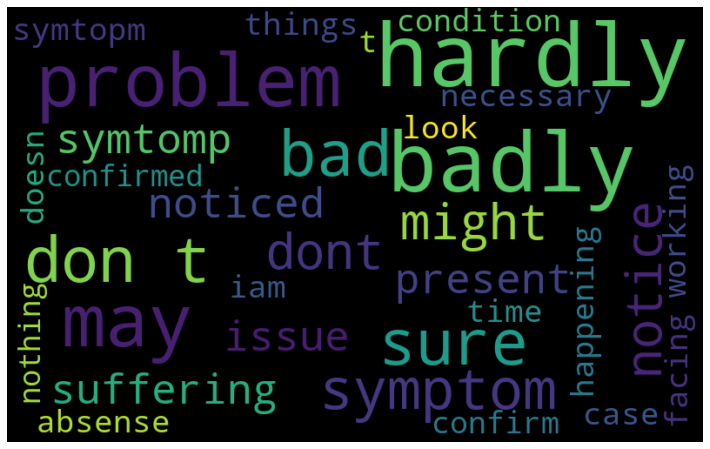

In [26]:
# frequent words visualization for no
all_words = " ".join([sentence for sentence in df['clean_text'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
df['clean_text'].head(10)

0          yes have
1          no don't
2         sure have
3    have it almost
4       highly have
5      Yes its good
6         sure have
7       surely have
8           no dont
9            am not
Name: clean_text, dtype: object

In [28]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(df['clean_text'])
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
bow_vectorizer.get_feature_names()

['about',
 'almost',
 'always',
 'am',
 'any',
 'are',
 'at',
 'bad',
 'badly',
 'be',
 'but',
 'condition',
 'days',
 'don',
 'dont',
 'feeling',
 'for',
 'good',
 'had',
 'happening',
 'hardly',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'highly',
 'improoving',
 'is',
 'issue',
 'it',
 'its',
 'like',
 'may',
 'maybe',
 'might',
 'no',
 'not',
 'nothing',
 'notice',
 'noticed',
 'or',
 'other',
 'present',
 'problem',
 'problems',
 'same',
 'since',
 'some',
 'suffering',
 'suppose',
 'sure',
 'surely',
 'symptoms',
 'symtomp',
 'that',
 'the',
 'there',
 'this',
 'to',
 'was',
 'wasn',
 'working',
 'yes']

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.20)

#  #1.Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [32]:
#LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
pred= model.predict(x_test)
pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [34]:
accuracy_score(y_test,pred)

1.0

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        23

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



<AxesSubplot:>

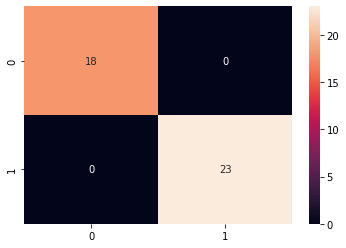

In [37]:
pred= model.predict(x_test)
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot = True)

In [38]:
from sklearn.metrics import roc_curve,auc

In [39]:
pred_prob = model.decision_function(x_test)

In [40]:
def plot_roc(y_test, probs): 
    fpr,tpr, threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr, tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr, tpr, label='AUC=%0.2f'%roc_auc, color="darkorange")
    plt.legend(loc= 'lower right')
    plt.plot([0,1], [0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show() 

ROC AUC=1.00


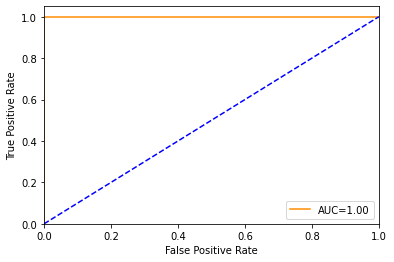

In [41]:
plot_roc(y_test, pred_prob)